In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv


In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



2025-09-25 15:14:30.179103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758813270.369737      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758813270.422281      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Adjust paths to Kaggle dataset
train = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e9/test.csv")
sample_sub = pd.read_csv("/kaggle/input/playground-series-s5e9/sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (524164, 11)
Test shape: (174722, 10)


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


# Inspect Dataset

In [4]:
# Info
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [5]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
id,524164.0,262081.500000,151313.257586,0.000000,131040.750000,262081.500000,393122.250000,524163.000000
RhythmScore,524164.0,0.632843,0.156899,0.076900,0.515850,0.634686,0.739179,0.975000
AudioLoudness,524164.0,-8.379014,4.616221,-27.509725,-11.551933,-8.252499,-4.912298,-1.357000
VocalContent,524164.0,0.074443,0.049939,0.023500,0.023500,0.066425,0.107343,0.256401
AcousticQuality,524164.0,0.262913,0.223120,0.000005,0.069413,0.242502,0.396957,0.995000
InstrumentalScore,524164.0,0.117690,0.131845,0.000001,0.000001,0.074247,0.204065,0.869258
LivePerformanceLikelihood,524164.0,0.178398,0.118186,0.024300,0.077637,0.166327,0.268946,0.599924
MoodScore,524164.0,0.555843,0.225480,0.025600,0.403921,0.564817,0.716633,0.978000
TrackDurationMs,524164.0,241903.692949,59326.601501,63973.000000,207099.876625,243684.058150,281851.658500,464723.228100
Energy,524164.0,0.500923,0.289952,0.000067,0.254933,0.511800,0.746000,1.000000


# Target Distribution (BeatsPerMinute

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


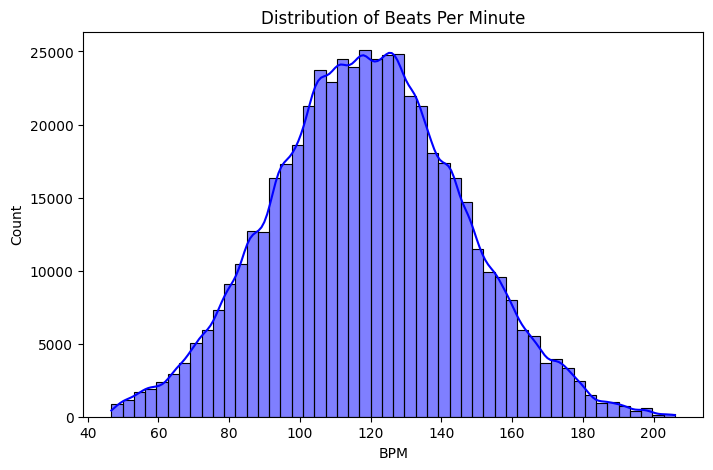

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(train["BeatsPerMinute"], bins=50, kde=True, color="blue")
plt.title("Distribution of Beats Per Minute")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


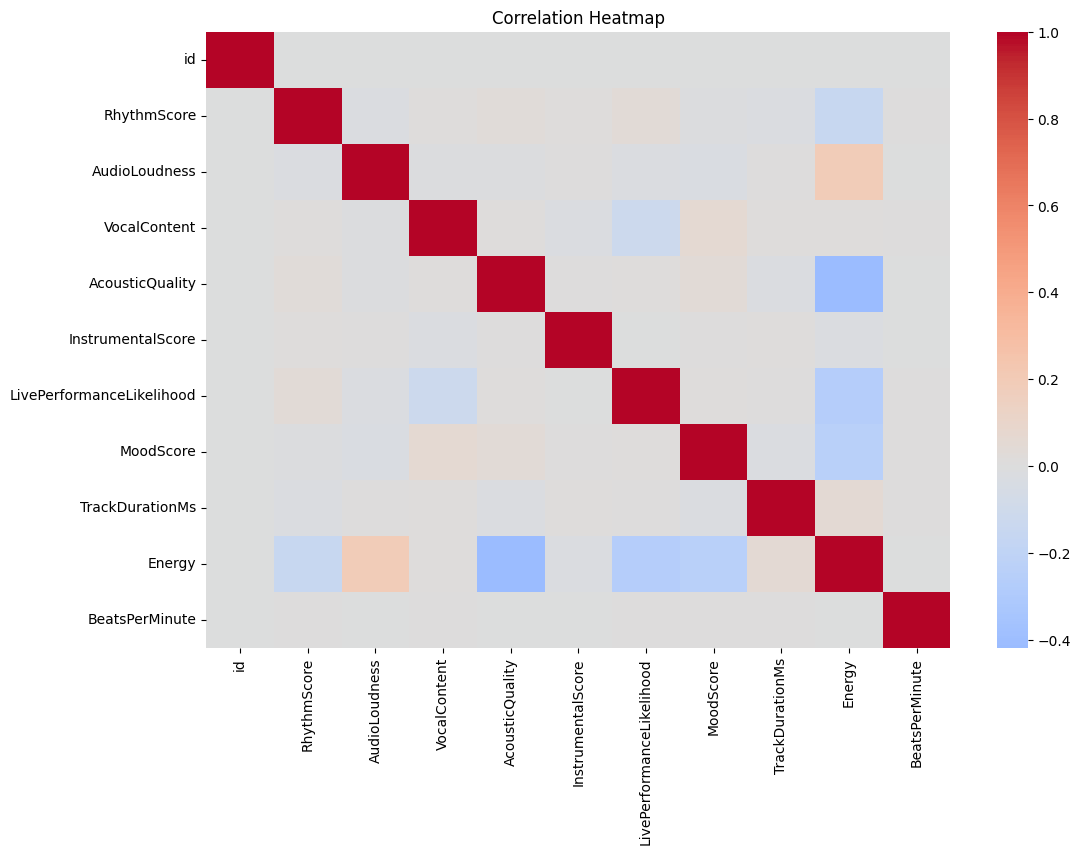

In [7]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr = train.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


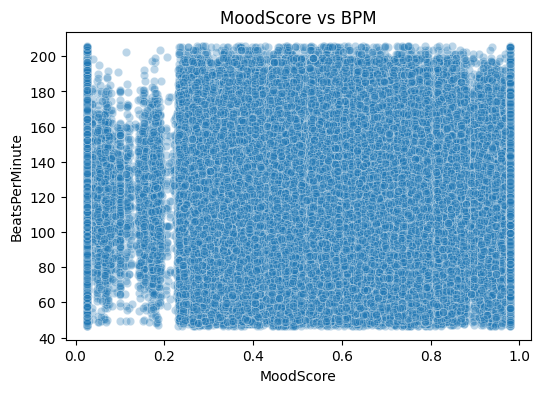

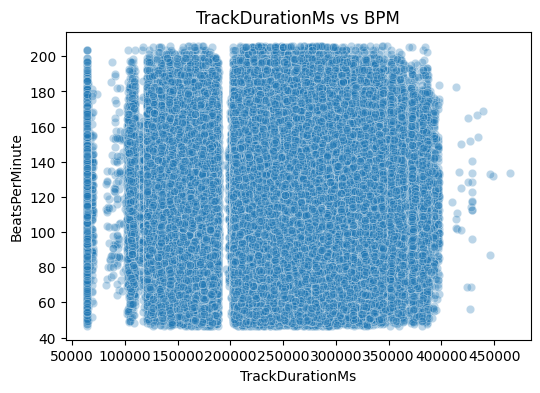

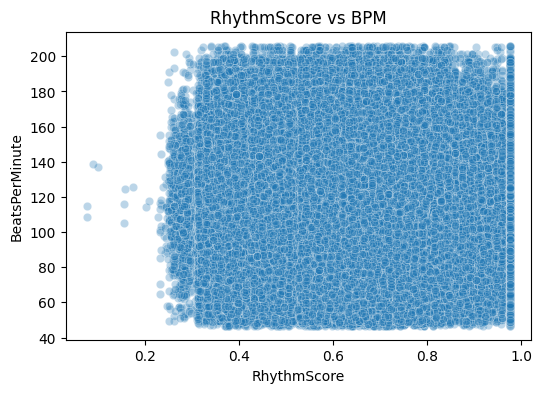

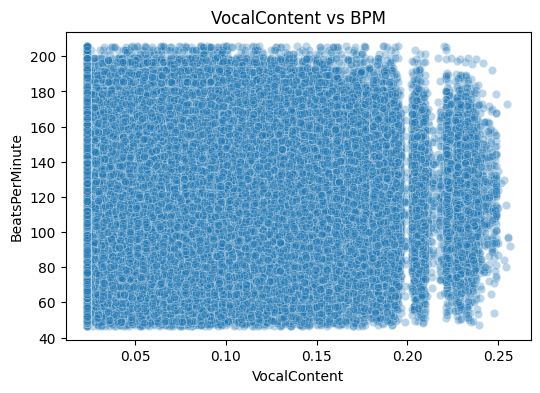

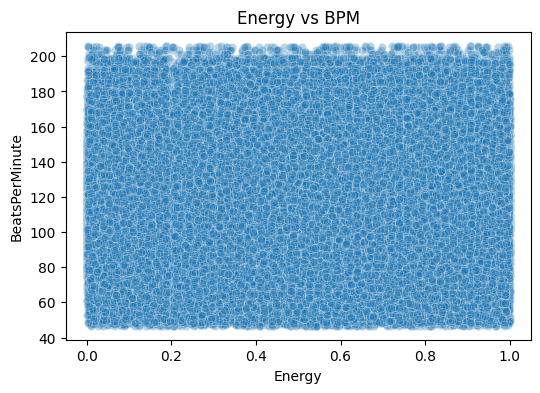

In [8]:
# Scatter plots for top correlated features
top_corr = corr["BeatsPerMinute"].abs().sort_values(ascending=False)[1:6].index
for col in top_corr:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[col], y=train["BeatsPerMinute"], alpha=0.3)
    plt.title(f"{col} vs BPM")
    plt.show()


# Preprocessing

In [9]:
# Drop ID column
X = train.drop(columns=["id", "BeatsPerMinute"])
y = train["BeatsPerMinute"]


In [10]:
# For test set
X_test = test.drop(columns=["id"])


In [11]:
# Handle categorical columns (if any)
X = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [12]:
# Align train/test columns
X, X_test = X.align(X_test, join="left", axis=1, fill_value=0)



In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# Build Deep Learning Model

In [15]:
# Build model
model = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # regression output
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758813293.703083      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [16]:
model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [17]:
# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50


I0000 00:00:1758813296.856362      63 service.cc:148] XLA service 0x7c4188009c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758813296.856963      63 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758813297.101821      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


  71/6553 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 11882.6240 - root_mean_squared_error: 108.4385

I0000 00:00:1758813298.539615      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6553/6553 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1302.8351 - root_mean_squared_error: 34.5421 - val_loss: 714.7382 - val_root_mean_squared_error: 26.7346
Epoch 2/50
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 766.2061 - root_mean_squared_error: 27.6803 - val_loss: 700.8345 - val_root_mean_squared_error: 26.4733
Epoch 3/50
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 750.9152 - root_mean_squared_error: 27.4028 - val_loss: 702.4818 - val_root_mean_squared_error: 26.5044
Epoch 4/50
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 735.8713 - root_mean_squared_error: 27.1268 - val_loss: 708.2706 - val_root_mean_squared_error: 26.6134
Epoch 5/50
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 723.4781 - root_mean_squared_error: 26.8974 - val_loss: 702.9327 - val_root_mean_squared_error: 26.5129
Epoch 6/50
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 714.7990 - root_mean_squared_error: 26.7356 - val_loss: 700.7248 - val_root_mean_squared_error: 26.4712
Epoch 7/